In [60]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
config_file = '../configs/double_heads/dh_faster_rcnn_r50_fpn_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../work_dirs/dh_faster_rcnn_r50_fpn_1x_coco/epoch_18.pth'

In [62]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([6, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([6]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([20, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([20]).


In [63]:
annFile = '/home/coco/annotations/cocojson_val_1.json'
print(f'Annotation file: {annFile}')
coco=COCO(annFile)
# 获取包含0的所有图片
id = coco.getCatIds(['1'])[0]
imgIds = coco.catToImgs[id]
print(f'图片共有：{len(imgIds)}张')

imgId = imgIds[55]
imgId = 687
imgId = 357
imgInfo = coco.loadImgs(imgId)[0]


Annotation file: /home/coco/annotations/cocojson_val_1.json
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
图片共有：396张


In [64]:
# this makes our figures bigger
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 12

{'file_name': 'f56d70524ca111ea9723000c29e37e62.jpg', 'width': 4912, 'id': 357, 'height': 3684}
图像357包含1个ann对象，分别是:
0


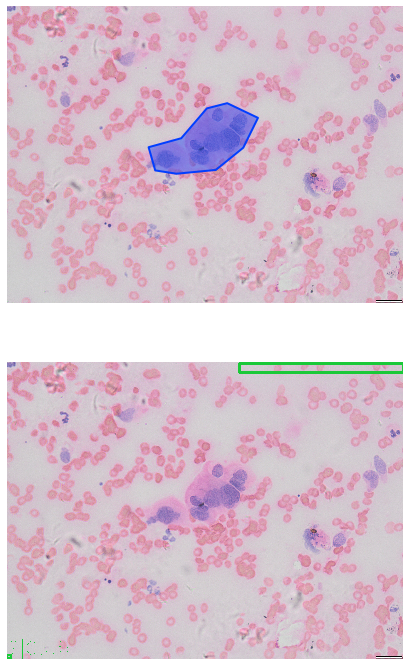

In [65]:
cocoRoot= "/home/coco/train2017/"
imgInfo = coco.loadImgs(imgId)[0]
print(imgInfo)
imPath = os.path.join(cocoRoot, imgInfo['file_name'])                     
im = cv2.imread(imPath)
plt.subplot(2,1,1)
plt.imshow(im[:,:,::-1])
plt.axis('off')

# 获取该图像对应的anns的Id
annIds = coco.getAnnIds(imgIds=imgInfo['id'])
print(f'图像{imgInfo["id"]}包含{len(annIds)}个ann对象，分别是:')
anns = coco.loadAnns(annIds)
for i in anns:
    print(i["category_id"])
coco.showAnns(anns)

## predict

# test a single image
img_path = '/home/coco/train2017/' + imgInfo["file_name"]
result = inference_detector(model, img_path)
# show the results
img = show_result_pyplot(model,img_path, result, score_thr=0.5)
plt.subplot(2,1,2)
plt.imshow(img)
plt.axis('off')

plt.show()